In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


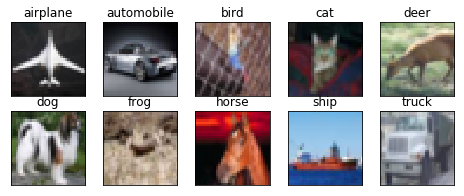

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [14]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 10s 27ms/step - loss: 1.9196 - acc: 0.2540 - val_loss: 1.5198 - val_acc: 0.4360
Epoch 2/50
390/390 [==============================] - 9s 23ms/step - loss: 1.4079 - acc: 0.4879 - val_loss: 1.1444 - val_acc: 0.5866
Epoch 3/50
390/390 [==============================] - 9s 23ms/step - loss: 1.1603 - acc: 0.5888 - val_loss: 0.9892 - val_acc: 0.6525
Epoch 4/50
390/390 [==============================] - 9s 23ms/step - loss: 1.0165 - acc: 0.6460 - val_loss: 0.9154 - val_acc: 0.6775
Epoch 5/50
390/390 [==============================] - 9s 23ms/step - loss: 0.9063 - acc: 0.6889 - val_loss: 0.8142 - val_acc: 0.7200
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8179 - acc: 0.7186 - val_loss: 0.7298 - val_acc: 0.7501
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7743 - acc: 0.7367 - val_loss: 0.6891 - val_acc: 0.7662
Epoch 8/50
390/390 [==============================] - 9s 23ms/step -

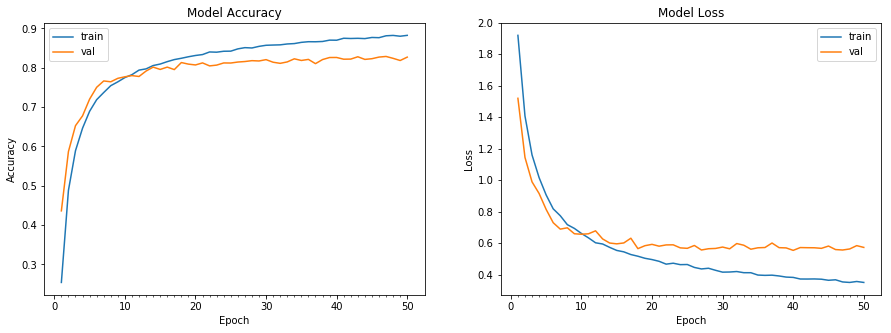

Accuracy on test data is: 82.68


In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [17]:
#model 2

# Define the model
model = Sequential()

#convolution layer 1
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))    ## 32x32  ## 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#convolution layer 2
model.add(Convolution2D(32, 3, 3, border_mode='same'))    ## 32x32  ## 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#convolution layer 3
model.add(Convolution2D(32, 3, 3, border_mode='same'))    ## 32x32  ## 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#transition layer
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 16x16

#convolution layer 4
model.add(Convolution2D(64, 3, 3, border_mode='same'))    ## 16x16  ## 14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#convolution layer 5
model.add(Convolution2D(64, 3, 3, border_mode='same'))    ## 16x16  ## 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#convolution layer 6
model.add(Convolution2D(64, 3, 3, border_mode='same'))    ## 16x16  ## 18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#transition layer
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 8x8    ## 24   

#convolution layer 5
model.add(Convolution2D(128, 3, 3, border_mode='same'))    ## 8x8  ## 36
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#convolution layer 6
model.add(Convolution2D(128, 3, 3, border_mode='same'))    ## 8x8x128  ## 38
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

model.add(Convolution2D(64, 1, 1, activation='relu'))  #8x8x64   

model.add(Convolution2D(10,8,8))    ## 1x1x10    ##rf --


model.add(Flatten())

model.add(Activation(activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipyke

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_35 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 32)        0         
__________

Epoch 1/100
  3/390 [..............................] - ETA: 21s - loss: 1.8961 - acc: 0.2812

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  """


390/390 [==============================] - 16s 42ms/step - loss: 1.4843 - acc: 0.4522 - val_loss: 1.6792 - val_acc: 0.4048
Epoch 2/100
390/390 [==============================] - 16s 41ms/step - loss: 1.1087 - acc: 0.6029 - val_loss: 1.1446 - val_acc: 0.5937
Epoch 3/100
390/390 [==============================] - 16s 41ms/step - loss: 0.9015 - acc: 0.6811 - val_loss: 1.1561 - val_acc: 0.6189
Epoch 4/100
390/390 [==============================] - 16s 41ms/step - loss: 0.7839 - acc: 0.7260 - val_loss: 0.8360 - val_acc: 0.7100
Epoch 5/100
390/390 [==============================] - 16s 41ms/step - loss: 0.7101 - acc: 0.7510 - val_loss: 0.8901 - val_acc: 0.6982
Epoch 6/100
390/390 [==============================] - 16s 41ms/step - loss: 0.6503 - acc: 0.7732 - val_loss: 1.2635 - val_acc: 0.5906
Epoch 7/100
390/390 [==============================] - 16s 41ms/step - loss: 0.6061 - acc: 0.7872 - val_loss: 0.7231 - val_acc: 0.7522
Epoch 8/100
390/390 [==============================] - 16s 41ms/ste

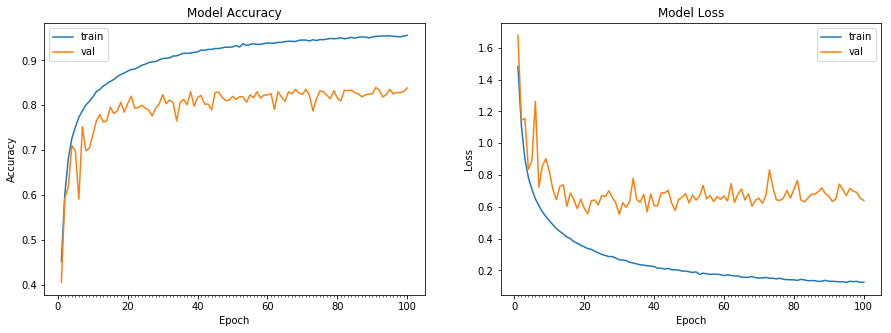

Accuracy on test data is: 83.86


In [20]:

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#getting 83.86 validation accuracy 